 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [8]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [9]:
whale_path = Path("Resources/whale_returns.csv")

In [10]:
# Reading whale returns
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [11]:
# Count nulls
whale_df.isnull().sum()    

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [13]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [14]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [15]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [17]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')
sp_tsx_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [19]:
# Calculate Daily Returns
daily_returns_sp = sp_tsx_df.pct_change()
daily_returns_sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [20]:
# Drop nulls
daily_returns_sp.dropna(inplace=True)

In [21]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp = daily_returns_sp.rename(columns={'Close': 'SP_TSX'})
daily_returns_sp.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
comb_returns = pd.concat([whale_df, algo_df, daily_returns_sp], axis="columns", join="inner")
comb_returns.head()
#whale_df.head()
#algo_df.head()
#daily_returns_sp.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

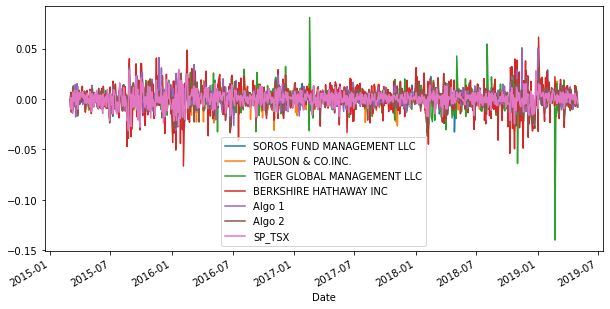

In [23]:
# Plot daily returns of all portfolios
comb_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

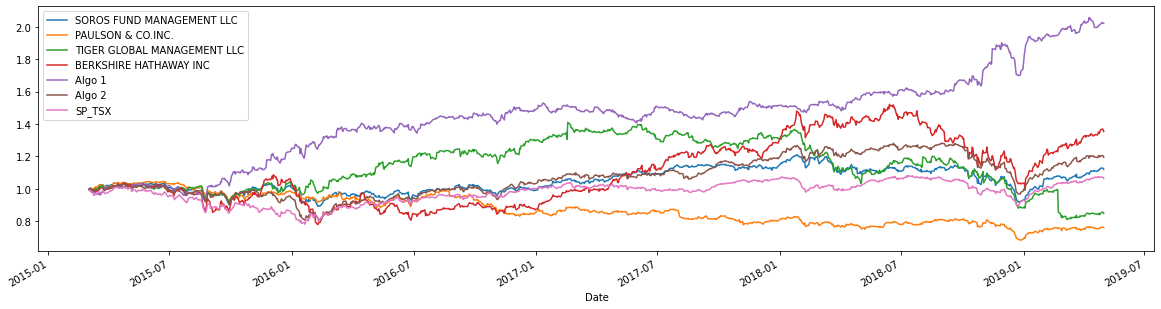

In [24]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + comb_returns).cumprod()
# Plot cumulative returns
cum_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

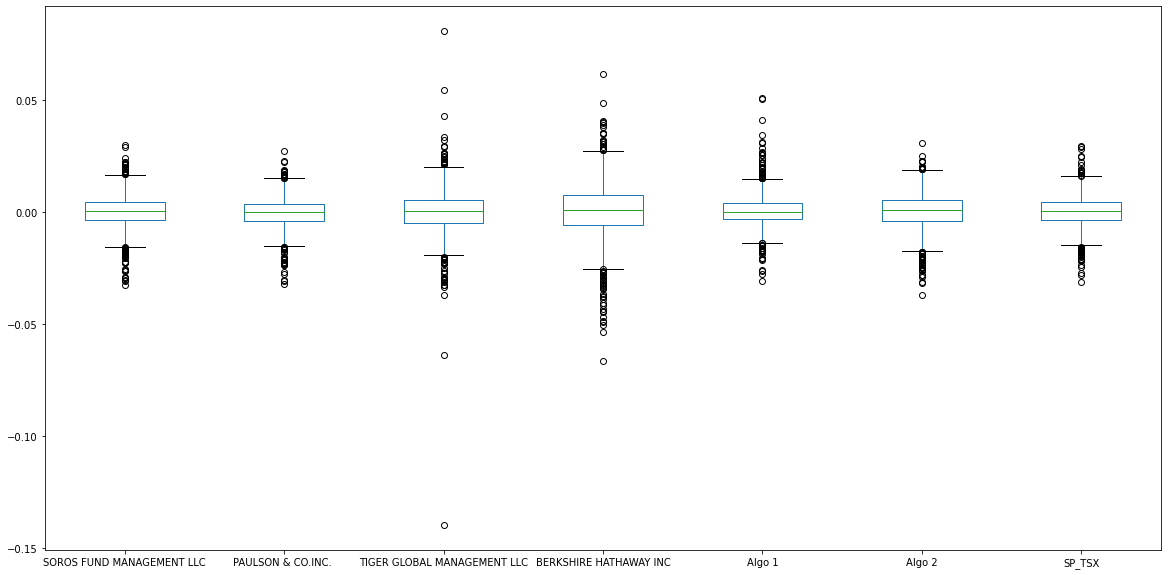

In [25]:
# Box plot to visually show risk
comb_returns.plot.box(figsize=(20,10))
#algo_df.plot.box(figsize=(20,10))
#daily_returns_sp.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
comb_returns_std = comb_returns.std()
comb_returns_std
#portfolio_whale_std = whale_df.std()
#portfolio_algo_std = algo_df.std()
#portfolio_sp_std = daily_returns_sp.std()
#portfolio_whale_std
#portfolio_algo_std
#portfolio_sp_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [27]:
# Calculate  the daily standard deviation of S&P TSX 60
#sp_std = daily_returns_sp.std()
#sp_std
# Determine which portfolios are riskier than the S&P TSX 60
#portfolio_whale_std = np.random.normal(scale=0.5, size=10000)
#portfolio_algo_std = np.random.normal(scale=1.0, size=10000)
#portfolio_sp_std = np.random.normal(scale=1.5, size=10000)

#portfolio_std = pd.DataFrame({
   # "Whale":portfolio_whale_std,
    #"Algo":portfolio_algo_std,
    #"SP":portfolio_sp_std
#})

#portfolio_std.plot.hist(stacked=True, bins=100)
comb_returns.std() > comb_returns['SP_TSX'].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP_TSX                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = comb_returns_std * np.sqrt(252)
#ann_whale_std = portfolio_whale_std * np.sqrt(252)
#ann_algo_std = portfolio_algo_std * np.sqrt(252)
#ann_sp_std = portfolio_sp_std * np.sqrt(252)
#ann_whale_std
#ann_algo_std
ann_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

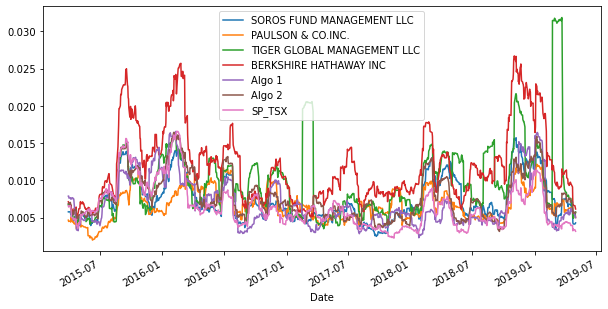

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_rol = comb_returns.rolling(window=21).std()
#whale_rol = whale_df.rolling(window=21).std()
#algo_rol = algo_df.rolling(window=21).std()
#sp_rol = daily_returns_sp.rolling(window=21).std()
# Plot the rolling standard deviation
#whale_rol.plot(figsize=(10,5))
#algo_rol.plot(figsize=(10,5))
#sp_rol.plot(figsize=(10,5))
comb_rol.plot(figsize=(10,5))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation
correlation = comb_returns.corr()
sp_cor = daily_returns_sp
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'ROLLING 30-DAY BETA OF ALGO 1'}, xlabel='Date'>

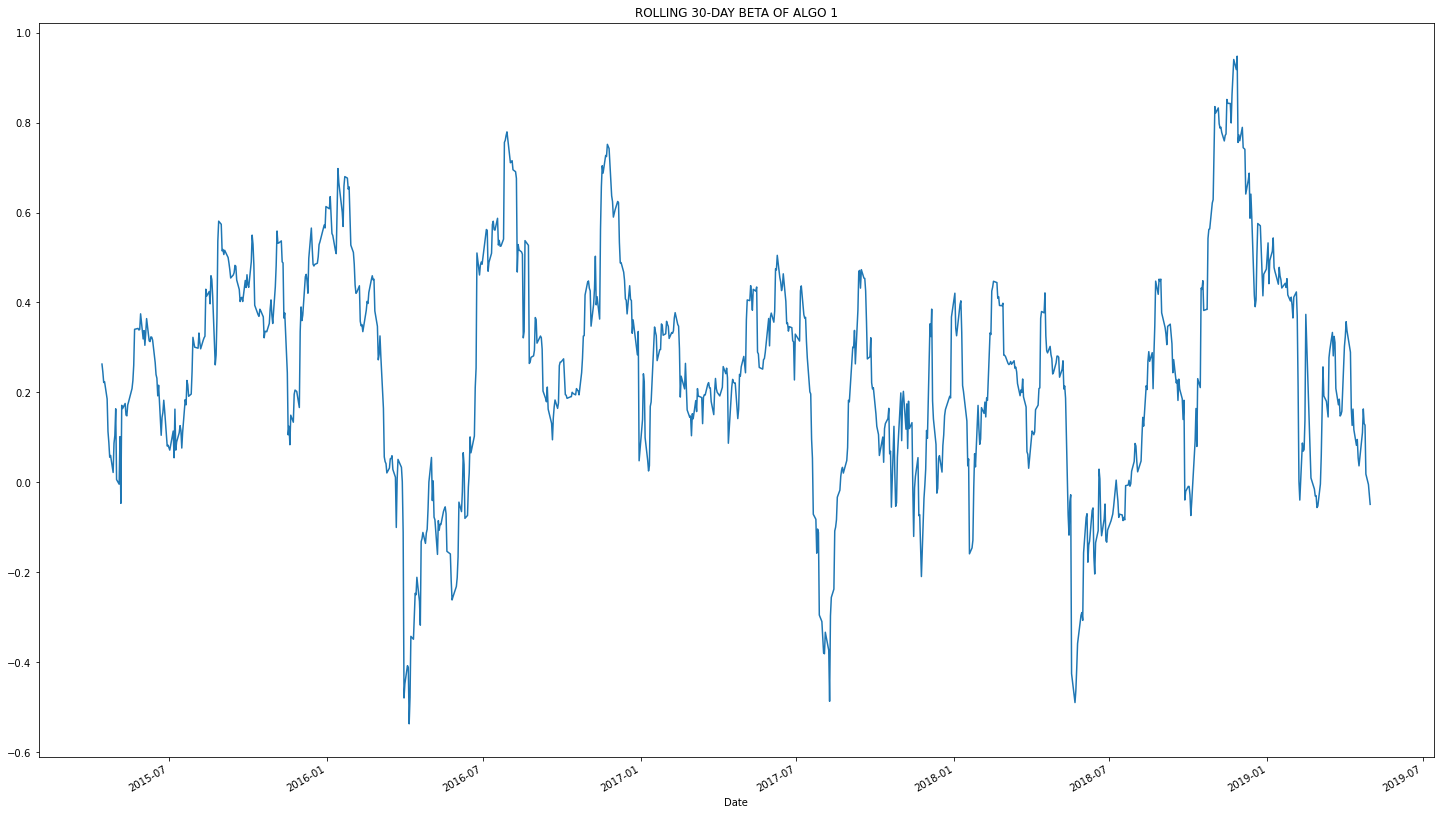

In [31]:
# Calculate covariance of a single portfolio
cov_algo1 = comb_returns['Algo 1'].cov(comb_returns['SP_TSX'])
# Calculate variance of S&P TSX
SP_TSX_Var = comb_returns['SP_TSX'].var()
# Computing beta
algo1_beta = cov_algo1 / SP_TSX_Var
# Plot beta trend
rolling_covariance = comb_returns['Algo 1'].rolling(window=30).cov(comb_returns['SP_TSX'])
rolling_variance = comb_returns['SP_TSX'].rolling(window=30).var()
rolling_algo1_beta = rolling_covariance / rolling_variance
rolling_algo1_beta.plot(figsize=(25,15), title='ROLLING 30-DAY BETA OF ALGO 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

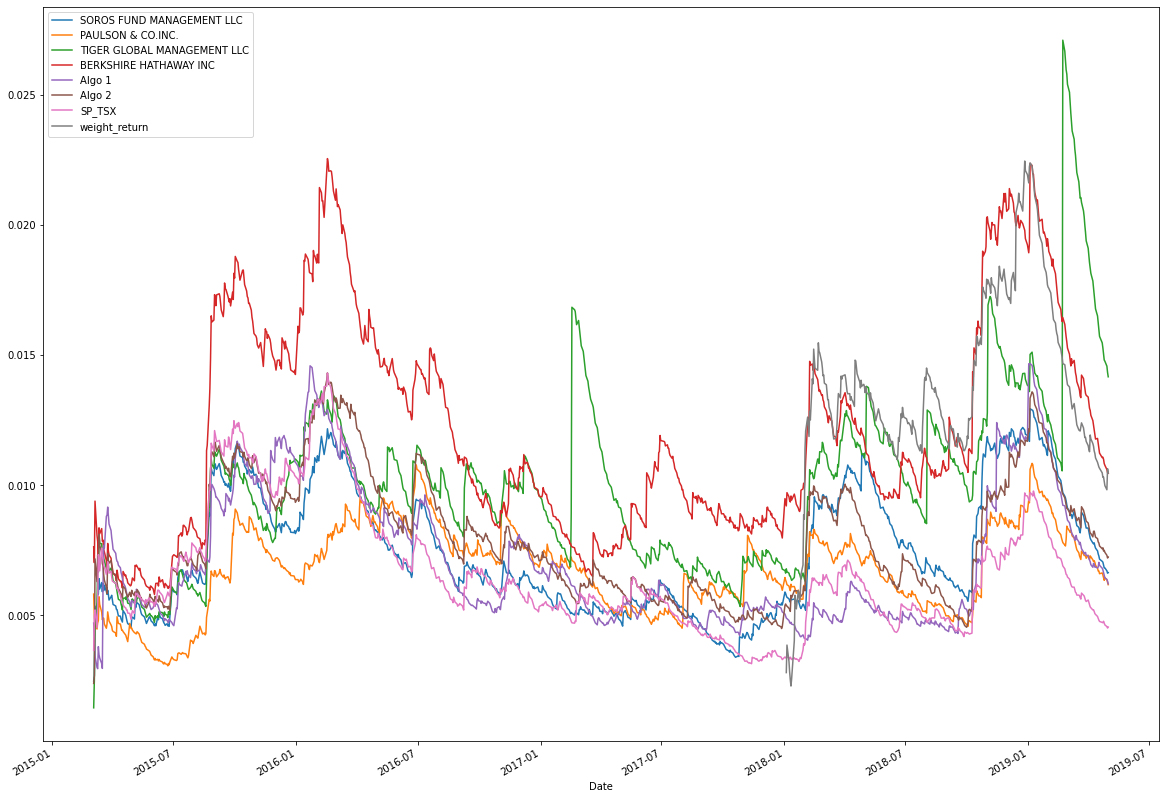

In [64]:
# Use `ewm` to calculate the rolling window
comb_returns.ewm(halflife=21).std().plot(figsize=(20,15))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = ((comb_returns.mean() - comb_returns['SP_TSX'].mean())*252)/(comb_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
SP_TSX                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

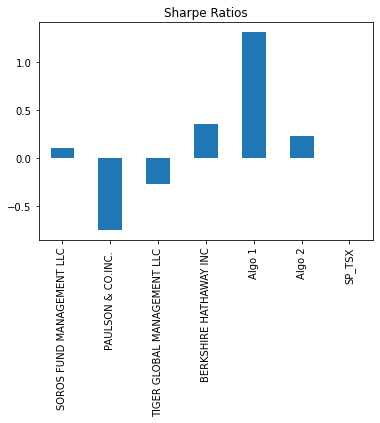

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
Print("I dont Know")

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [35]:
# Reading data from 1st stock
shop_path = Path('Resources/shop_historical.csv')
shop_df = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#shop_df = shop_df.sort_index()
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [36]:
# Reading data from 2nd stock
otex_path = Path('Resources/otex_historical.csv')
otex_df = pd.read_csv(otex_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#otex_df = otex_df.sort_index()
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [37]:
# Reading data from 3rd stock
l_path = Path('Resources/l_historical.csv')
l_df = pd.read_csv(l_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
#l_df=l_df.sort_index()
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [38]:
# Combine all stocks in a single DataFrame
comb_stock_df = pd.concat([shop_df, otex_df, l_df], axis="columns", join="inner")
comb_stock_df

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [39]:
# Reset Date index
all_prices = pd.concat([shop_df, otex_df, l_df], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51
...,...,...,...
1498,2019-12-20,L,67.90
1499,2019-12-23,L,67.68
1500,2019-12-24,L,67.67
1501,2019-12-27,L,67.78


In [40]:
# Reorganize portfolio data by having a column per symbol
all_prices_n = all_prices.pivot_table(values="Close", index="Date", columns="Symbol")
all_prices_n

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [41]:
# Calculate daily returns
port_daily_returns = all_prices_n.pct_change()
# Drop NAs
port_daily_returns_clean = port_daily_returns.dropna()
# Display sample data
port_daily_returns_clean

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = port_daily_returns_clean.dot(weights)
# Display sample data
#portfolio_returns.head()
comb_returns['weight_return'] = portfolio_returns
comb_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,weight_return
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
returns_updated = pd.concat([port_daily_returns_clean, portfolio_returns], axis="columns", join="inner")
returns_updated.columns=['L', 'OTEX', 'SHOP', 'NEW']

In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_updated.dropna(inplace=True)
returns_updated

,L,OTEX,SHOP,NEW
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999
...,...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503,0.007495
2019-12-23,-0.003240,-0.013463,-0.003118,-0.006607
2019-12-24,-0.000148,-0.007773,0.026915,0.006331


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
returns_updated_std = returns_updated * np.sqrt(252)
returns_updated_std

,L,OTEX,SHOP,NEW
Date,,,,
2018-01-03,-0.158772,-0.185773,0.371439,0.008964
2018-01-04,0.002765,-0.058972,0.271329,0.071707
2018-01-05,0.000000,-0.125783,-0.023097,-0.049627
2018-01-08,-0.154819,-0.152890,0.260219,-0.015830
2018-01-09,0.142385,-0.011296,-0.178647,-0.015853
...,...,...,...,...
2019-12-20,0.056309,0.387994,-0.087361,0.118981
2019-12-23,-0.051434,-0.213716,-0.049490,-0.104880
2019-12-24,-0.002346,-0.123398,0.427255,0.100504


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

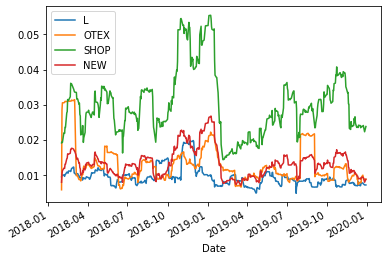

In [47]:
# Calculate rolling standard deviation
retup_rol = returns_updated.rolling(window=21).std()
# Plot rolling standard deviation
retup_rol.plot()

### Calculate and plot the correlation

In [56]:
# Calculate and plot the correlation
retup_corr = returns_updated.corr()
retup_corr


,L,OTEX,SHOP,NEW
L,1.000000,0.181266,0.127501,0.390044
OTEX,0.181266,1.000000,0.398427,0.672637
SHOP,0.127501,0.398427,1.000000,0.913094
NEW,0.390044,0.672637,0.913094,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'ROLLING 60-DAY BETA OF NEW PORTFOLIO'}, xlabel='Date'>

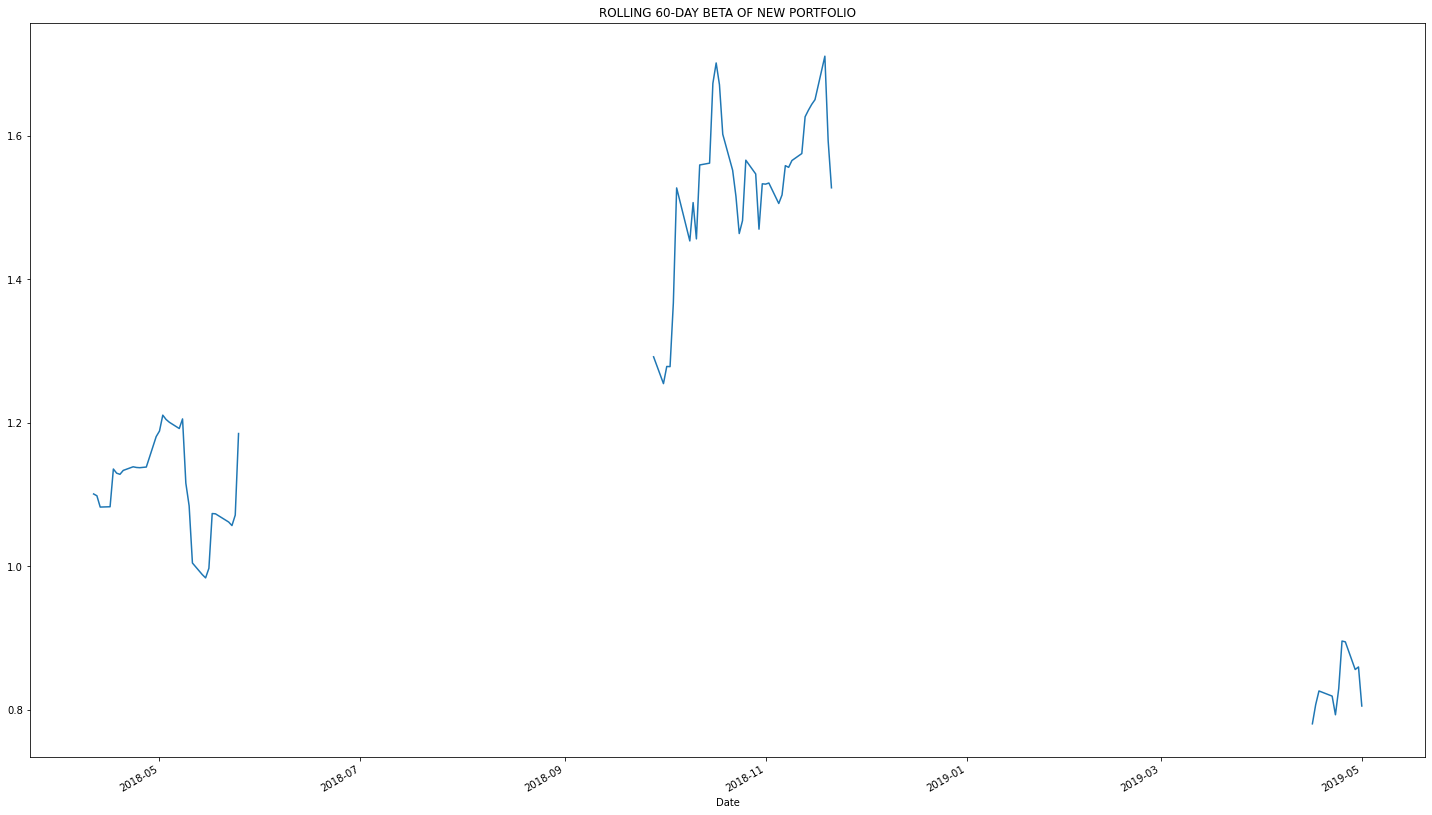

In [58]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio

rolling_covariance_NEW = returns_updated['NEW'].rolling(window=60).cov(comb_returns['SP_TSX'])
rolling_variance = comb_returns['SP_TSX'].rolling(window=60).var()

# Computing beta
rolling_NEW_beta = rolling_covariance_NEW / rolling_variance

# Plot beta trend
rolling_NEW_beta.plot(figsize=(25,15), title='ROLLING 60-DAY BETA OF NEW PORTFOLIO')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_new = ((returns_updated.mean() - comb_returns['SP_TSX'].mean())*252)/(returns_updated.std()*np.sqrt(252))
sharpe_ratios_new

L       0.426774
OTEX    0.642012
SHOP    1.610833
NEW     1.522779
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

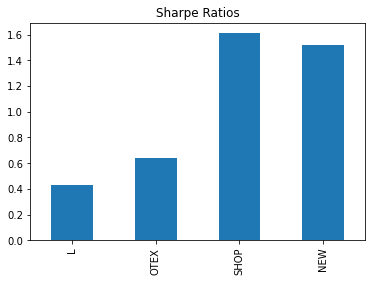

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar", title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!